In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

plt.style.use("seaborn-v0_8") 
%config InlineBackend.figure_format = "svg"

In [89]:
# EV - Expected Value 

p_win = 0.6
gain = 100
loss = 50

EV = p_win * gain - (1 - p_win) * loss
print("Expected Value per trade:", EV)

Expected Value per trade: 40.0


In [102]:
# Binomial Probability - EXACTLY k successes in n trials
# n - Total Trials
# k - Number of positive outcomes we want
# p - Win probability

n = 10 
k = 6 
p = 0.55

binom_exact = comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print(f"Probability of {k} wins in {n} trades = {binom_exact:.4f}")

Probability of 6 wins in 10 trades = 0.2384


In [91]:
# Binomial Probability - ATLEAST k successes in n trials
import math

def binomial_prob(n, k, p):
    """Probability of exactly k successes in n trials."""
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# Example: 10 trades, p=0.6 win rate
n = 10
p = 0.6

# At least 7 wins
k_min = 7
binom_atleast = sum(binomial_prob(n, i, p) for i in range(k_min, n+1))

print(f"Probability of at least {k_min} wins out of {n} = {binom_atleast:.4f}")

Probability of at least 7 wins out of 10 = 0.3823


In [92]:
# Bayes Theorem
# P(A | B) = P(B | A) * P(A) / P(B)

p_edge = 0.2 # prior (chance a trader has an edge for example)
p_profitable_given_edge = 0.7 
p_profitable_given_no_edge = 0.1 

# In words - probability that a trader has an edge is 20%. The percent a trader is profitable with given edge is 70%, with a 10% false rate. 
# What is the probability that an edge is present if the trader is profitable?

# total probability of profitability - (now that's a tongue twister)
p_profitable = p_profitable_given_edge * p_edge + p_profitable_given_no_edge * (1-p_edge) # Total Evidence

# Bayes Result
posterior = (p_profitable_given_edge * p_edge) / p_profitable # Scenario we are looking for / total evidence
print(f"P(Edge | Profitable) = {posterior:.4f}")

P(Edge | Profitable) = 0.6364


In [93]:
# Variance & SD

returns = np.array([10, -10, 20, -5, 15])

mean = np.mean(returns)
variance = np.var(returns)
sd = np.std(returns)

print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", sd)

Mean: 6.0
Variance: 134.0
Standard Deviation: 11.575836902790225


In [94]:
# Covariance & Correlation

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 9])

cov_matrix = np.cov(x, y, ddof = 0)
corr_matrix = np.corrcoef(x, y)

print("Covariance matrix:\n", cov_matrix, end = "\n\n")
print("Correlation matrix:\n", corr_matrix)

Covariance matrix:
 [[2.   3.6 ]
 [3.6  6.56]]

Correlation matrix:
 [[1.         0.99388373]
 [0.99388373 1.        ]]


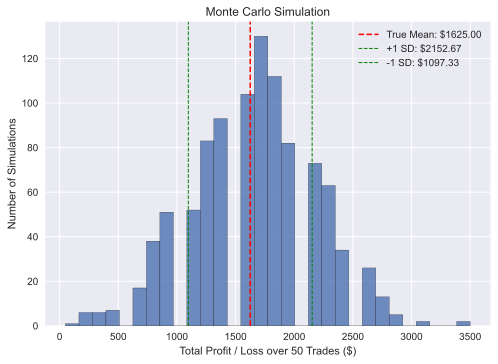

In [116]:
# Monte Carlo Simulation

# Monte Carlo function
def monte_carlo(n_sims=1000, n_trades=50, p=0.55, win=100, loss=50):
    outcomes = []
    for _ in range(n_sims):
        trades = np.where(np.random.rand(n_trades) < p, win, -loss)
        outcomes.append(np.sum(trades))
    return np.array(outcomes)

# Run simulations
results = monte_carlo()

# Calculate true mean and SD
ev_per_trade = 0.55*100 + 0.45*(-50)  # 32.5
true_mean = ev_per_trade * 50          # 50 trades → 1625

# Standard deviation of a single trade
sd_trade = np.sqrt((100 - ev_per_trade)**2 * 0.55 + (-50 - ev_per_trade)**2 * 0.45)
sd_total = sd_trade * np.sqrt(50)  # SD scales with sqrt(n)

# Plot histogram
plt.hist(results, bins = 30, edgecolor = "black", alpha = 0.8)
plt.axvline(true_mean, color = "red", linestyle = "dashed", linewidth = 1.5, label = f"True Mean: ${true_mean:.2f}")
plt.axvline(true_mean + sd_total, color = "green", linestyle = "dashed", linewidth = 1, label = f"+1 SD: ${round(true_mean + sd_total,2)}")
plt.axvline(true_mean - sd_total, color = "green", linestyle = "dashed", linewidth = 1, label = f"-1 SD: ${round(true_mean - sd_total,2)}")

plt.xlabel("Total Profit / Loss over 50 Trades ($)")
plt.ylabel("Number of Simulations")
plt.title("Monte Carlo Simulation")
plt.legend()
plt.show()